<a href="https://colab.research.google.com/github/noemigarcia27/SImulacion-II/blob/main/Ejercicio_20_11_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ejercicio 20/noviembre/2025**

1. Poner las librerias necesarias para hacer funcionar el codigo


In [1]:
import numpy as np
from random import expovariate
import matplotlib.pyplot as plt
from scipy.stats import poisson
from math import inf as Infinity

2. Imprimir "El nùmero de cleintes en el sistema"

In [2]:
tpll = 2.0
tps = 1.0
T = 100
N = 0
t = 0
tiempo = [0]
eventos = [0]

while t <= T:
  N = N + 1
  t = t + expovariate(1/tpll)
  tiempo.append(t)
  eventos.append(N)

tiempo = np.array(tiempo)
eventos = np.array(eventos)

print("El nùmero de clientes en el sistema es: ", N)

El nùmero de clientes en el sistema es:  58


3. Gràficar los eventos

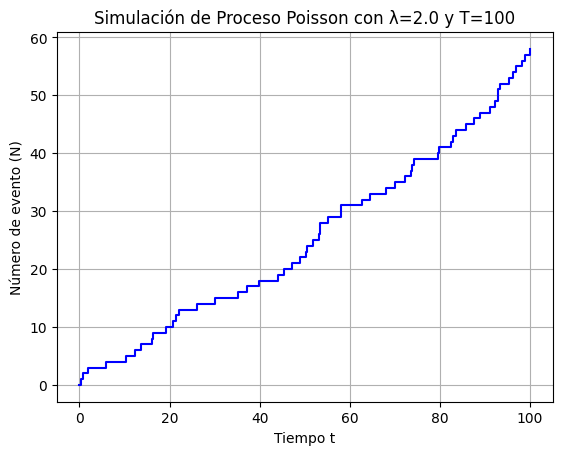

In [3]:
plt.step(tiempo, eventos, where="post", color="b", label="Tiempos de eventos")
plt.ylabel('Número de evento (N)')
plt.xlabel('Tiempo t')
plt.title(f"Simulación de Proceso Poisson con λ={tpll} y T={T}")
plt.grid(True)
plt.show()

4. Hacer que tambien se vean las salidas

In [4]:
t=0
N=0

T_arrivo = expovariate(1/tpll)
T_salida = Infinity

X = []
Y = []

while t <= T:

  tll = expovariate(1/tpll)
  ts = expovariate(1/tps)

  if tll < ts:
    N += 1
    t = t + tll
    T_arrivo = t
    X.append(t)
    Y.append(N)
  else:
    if N > 0:
      N -= 1
      t = t + ts
      X.append(t)
      Y.append(N)
X = np.array(X)
Y = np.array(Y)

5. Graficar Y vs X

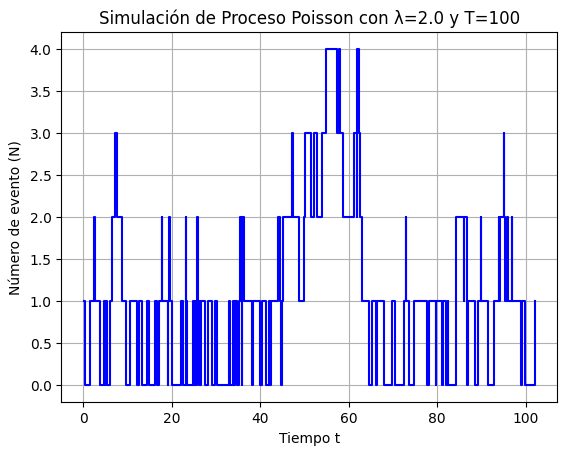

In [5]:
plt.step(X, Y, where="post", color="b", label="Tiempos de eventos")
plt.ylabel('Número de evento (N)')
plt.xlabel('Tiempo t')
plt.title(f"Simulación de Proceso Poisson con λ={tpll} y T={T}")
plt.grid(True)
plt.show()

6. Calcular la integral
$$ L = \dfrac{1}{T_0} \int_{0}^{T_0} N(t) dt $$
para tener el promedio de clientes en el sitema

Tiempo de respuesta o retraso: W
tiempo total que un cliente pasa en el sitema (cola + servicio)
$$ W = \frac{\sum_{i=1}^{D} W_i }{D} $$
$W_i:$ tiempo de retraso del cliente i

$D:$ numero de salida

In [6]:
integrand = np.array(Y[:-1] * np.diff(X)) #Area de cada rectangulo
N_dt = np.sum(integrand) #Sumatoria
L_calculado = N_dt / T

EL valor de la integral es:

In [7]:
N_dt

np.float64(105.55298641591945)

El número promedio de clientes en el sistema es:

In [8]:
L_calculado

np.float64(1.0555298641591946)

Ahora, ¿Cómo podemos estimar las probabilidades de que haya 1, 2, 3,... clientes en el sistema?

La fórmula para calcular $ P_k $ a partir de la simulación es:

$$ P_k = \frac{ \text{Tiempo total que el sistema tuvo k clientes}}{ \text{Tiempo total de simulación (T)} } $$

In [9]:
duracion = np.diff(X) #Direfencia entre el tiempo de un evento y el anterior
estados = Y[:-1] #Obtenemos el numero de clientes antes del siguiente evento

tiempo_en_estado = {} #Almacenamos el tiempo total para cada estado
clientes_unicos = np.unique(estados) #Obtener los numerod de clientes unicos observados

for k in clientes_unicos:
  #Esta mascara nos ayuda a encontrar toas las duraciones donde el num de clientes es igual a k
  mascara_boleana = (estados == k)

  T_k = np.sum(duracion[mascara_boleana])
  tiempo_en_estado[k] = T_k

  P_k = T_k / T

In [10]:
print(f"| P({k} clientes) = {T_k:.4f} / {T} = {P_k:.4f}")

| P(4 clientes) = 2.9955 / 100 = 0.0300


Ahora vamos a implementar las formulas teóricas de la fila M/M/1

| Parámetro  |    Fórmula teórica           |
|------------|------------------------------|
|     L      | $ L = \frac{λ}{μ-λ} $        |
|  $ L_q $   | $ L_q = \frac{λ^2}{μ(μ-λ)} $ |
|     W      | $ W = \frac{1}{μ-λ} $        |
|  $ W_q $   | $ W_q = \frac{λ}{μ(μ-λ)} $   |

Donde
*  $ λ $ es la tasa de arribo (1/tpll)
*  $ μ $ es la tasa de servicio (1/tps)
*  $ ρ = \frac{λ}{μ} $ es el factor de utilización

In [11]:
lambda_ = 1 / tpll
mu_ = 1 / tps

rho_ = lambda_ / mu_

if rho_ >= 1:
  print("Error: El sistema es inestable")
else:
  L_teo = lambda_ / (mu_ - lambda_)
  Lq_teo = (lambda_ ** 2) / (mu_ * (mu_ - lambda_))

In [12]:
L_teo

1.0

**Compraración de resultados**


In [13]:
comparacion = abs(L_teo - L_calculado)

In [14]:
comparacion

np.float64(0.055529864159194586)